# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [46]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&APPID={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"] ["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | usinsk
Processing Record 9 of Set 1 | kailua-kona
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | mingshui
Processing Record 13 of Set 1 | vernon
Processing Record 14 of Set 1 | rio grande
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | aykhal
Processing Record 19 of Set 1 | coos bay
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | sullivan
Processing Record 22 of Set 1 | loreto
P

Processing Record 41 of Set 4 | utrik
Processing Record 42 of Set 4 | sangueya
Processing Record 43 of Set 4 | mana
Processing Record 44 of Set 4 | bardsir
Processing Record 45 of Set 4 | ghormach
Processing Record 46 of Set 4 | baoding
Processing Record 47 of Set 4 | taber
Processing Record 48 of Set 4 | chichli
Processing Record 49 of Set 4 | muroto-misakicho
Processing Record 0 of Set 5 | albertina
Processing Record 1 of Set 5 | hanzhong
Processing Record 2 of Set 5 | palm beach gardens
Processing Record 3 of Set 5 | port shepstone
Processing Record 4 of Set 5 | lepsy
Processing Record 5 of Set 5 | kalevala
Processing Record 6 of Set 5 | bloemfontein
Processing Record 7 of Set 5 | port lincoln
Processing Record 8 of Set 5 | east london
Processing Record 9 of Set 5 | minas de matahambre
City not found. Skipping...
Processing Record 10 of Set 5 | gryazovets
Processing Record 11 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 12 of Set 5 | kili
Processing Record 13 

Processing Record 32 of Set 8 | pukchil-lodongjagu
Processing Record 33 of Set 8 | berezovyy
Processing Record 34 of Set 8 | cidade velha
Processing Record 35 of Set 8 | aitape
Processing Record 36 of Set 8 | pamandzi
Processing Record 37 of Set 8 | nagqu
Processing Record 38 of Set 8 | mahina
Processing Record 39 of Set 8 | dongxi
Processing Record 40 of Set 8 | labuan lombok
City not found. Skipping...
Processing Record 41 of Set 8 | gadzhiyevo
Processing Record 42 of Set 8 | waitara
Processing Record 43 of Set 8 | awjilah
Processing Record 44 of Set 8 | usogorsk
Processing Record 45 of Set 8 | pacific grove
Processing Record 46 of Set 8 | moshkovo
Processing Record 47 of Set 8 | corowa
Processing Record 48 of Set 8 | inari
Processing Record 49 of Set 8 | kulia village
City not found. Skipping...
Processing Record 0 of Set 9 | portland
Processing Record 1 of Set 9 | oranjemund
Processing Record 2 of Set 9 | howard springs
Processing Record 3 of Set 9 | remire-montjoly
Processing Reco

Processing Record 18 of Set 12 | minbu
Processing Record 19 of Set 12 | komsomol'skiy
Processing Record 20 of Set 12 | canutama
Processing Record 21 of Set 12 | lospalos
Processing Record 22 of Set 12 | buenaventura
Processing Record 23 of Set 12 | st. john's
Processing Record 24 of Set 12 | aceuchal
Processing Record 25 of Set 12 | kirakira
Processing Record 26 of Set 12 | corner brook
Processing Record 27 of Set 12 | hailar
Processing Record 28 of Set 12 | melfort
Processing Record 29 of Set 12 | zhenlai
Processing Record 30 of Set 12 | sekong
Processing Record 31 of Set 12 | xai-xai
Processing Record 32 of Set 12 | renk
City not found. Skipping...
Processing Record 33 of Set 12 | sambava
Processing Record 34 of Set 12 | ad darb
Processing Record 35 of Set 12 | rapla
Processing Record 36 of Set 12 | anjiang
Processing Record 37 of Set 12 | lowell
Processing Record 38 of Set 12 | ahau
City not found. Skipping...
Processing Record 39 of Set 12 | nanning
Processing Record 40 of Set 12 |

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,61.81,45,47,15.88,NZ,1702258437
1,dudinka,69.4058,86.1778,-16.38,97,100,11.99,RU,1702258438
2,bredasdorp,-34.5322,20.0403,58.68,84,0,3.04,ZA,1702258438
3,albany,42.6001,-73.9662,45.18,91,100,3.00,US,1702258196
4,whitehorse,60.7161,-135.0538,9.37,83,100,4.61,CA,1702258181


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,61.81,45,47,15.88,NZ,1702258437
1,dudinka,69.4058,86.1778,-16.38,97,100,11.99,RU,1702258438
2,bredasdorp,-34.5322,20.0403,58.68,84,0,3.04,ZA,1702258438
3,albany,42.6001,-73.9662,45.18,91,100,3.00,US,1702258196
4,whitehorse,60.7161,-135.0538,9.37,83,100,4.61,CA,1702258181
5,georgetown,5.4112,100.3354,84.13,83,20,5.75,MY,1702258297
6,usinsk,65.9939,57.5281,-19.93,100,100,1.01,RU,1702258439
7,kailua-kona,19.6406,-155.9956,82.36,77,40,5.75,US,1702258440
8,west island,-12.1568,96.8225,80.58,74,75,10.36,CC,1702258171


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

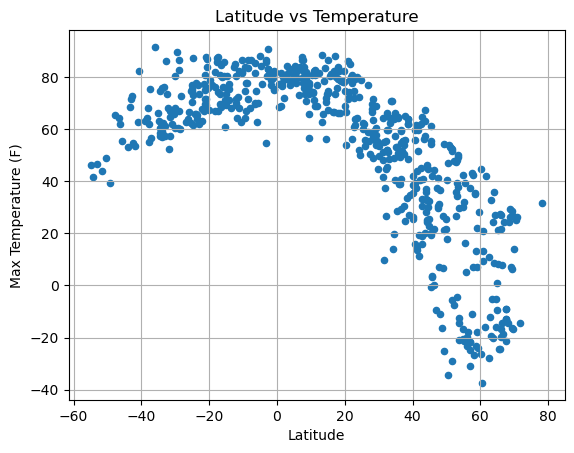

In [52]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", title="Latitude vs Temperature")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

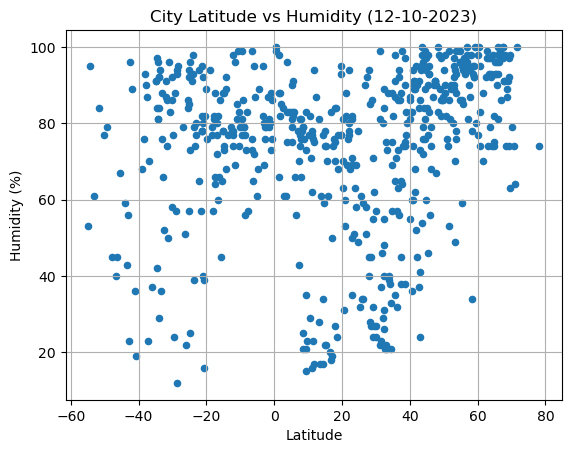

In [53]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', title=f'City Latitude vs Humidity (12-10-2023)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

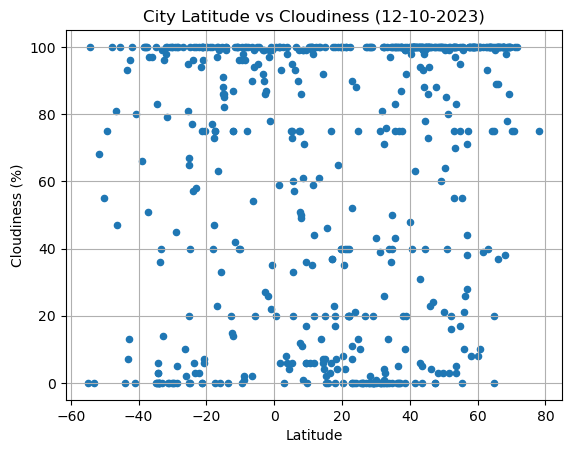

In [54]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", title="City Latitude vs Cloudiness (12-10-2023)")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

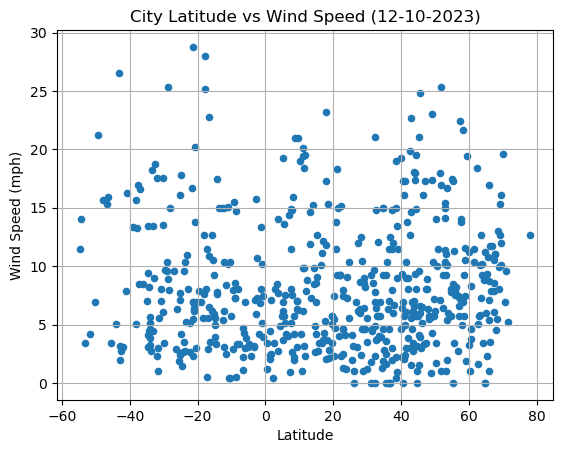

In [55]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", title="City Latitude vs Wind Speed (12-10-2023)")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(df, y_column, title, y_label):
    # Define x values (Latitude)
    x_values = df['Lat']
    # Define y values 
    y_values = df[y_column]

    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, _, _) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, (min(x_values),min(y_values)), fontsize=15, color="red")

    # Add labels and title to plot
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)

    # Print r square value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df, 'Max Temp', 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Max Temp')

The r-value is: 0.4121057168607245


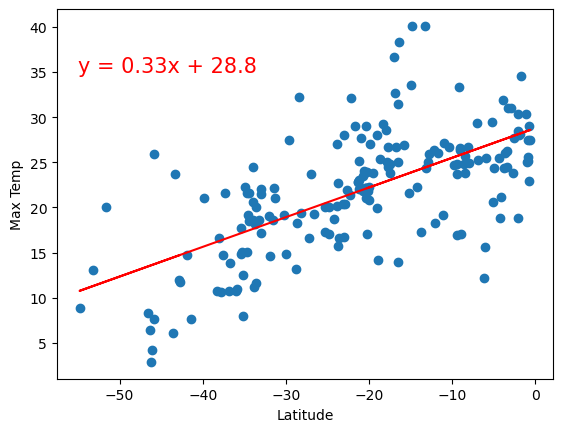

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


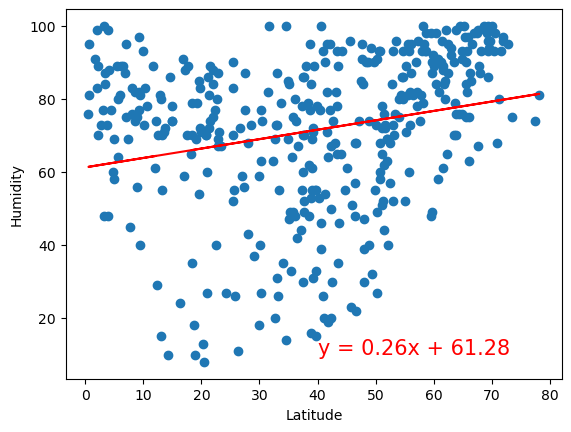

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


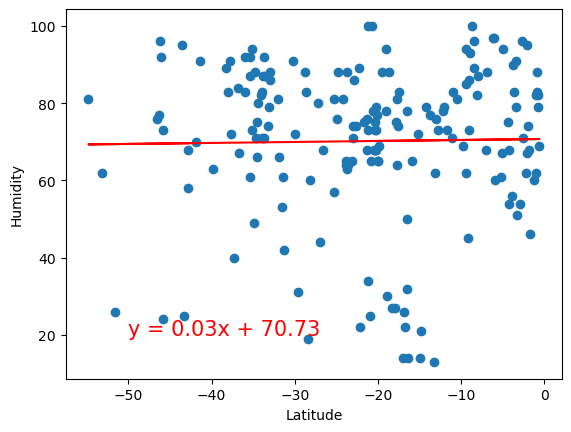

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


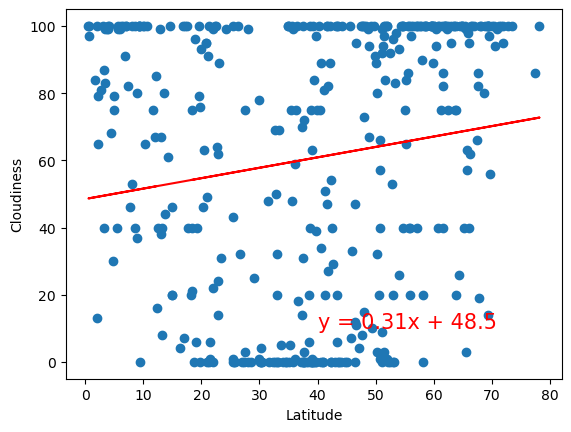

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


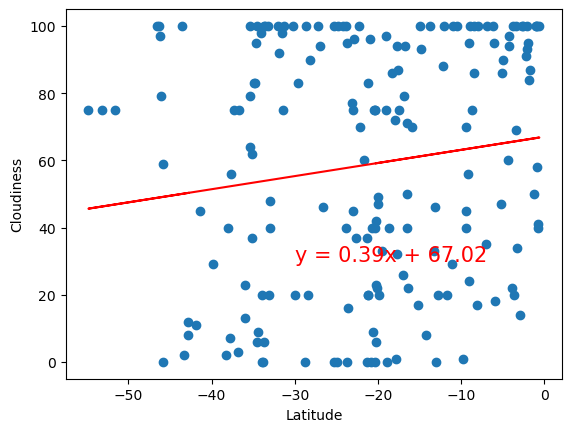

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


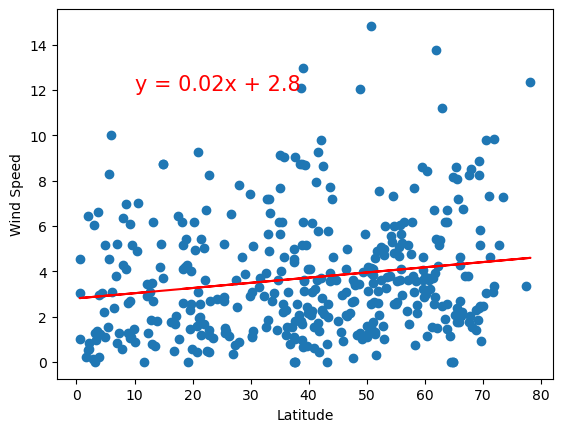

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


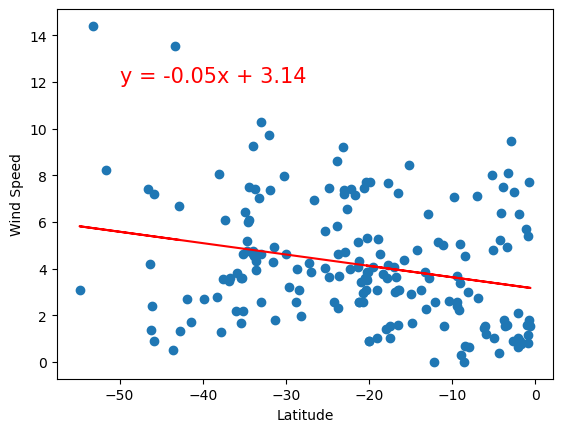

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE